In [42]:
!pip install --upgrade pip
!pip install pandas interpret seaborn matplotlib scikit-learn pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.2/317.2 MB 35.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.5-py2.py3-none-any.whl size=317747861 sha256=3974f88a322f6f91dd720045cf8521b5732eef98b4ec9daf75e5f3f60fdf5081
  Stored in directory: /Users/johnjones/Library/Caches/pip/wheels/0c/7f/b4/0e68c6d8d89d2e582e5498ad88616c16d7c19028680e9d3840
Successfully built pyspark


# Loading Data

In Python we use the **csv** module with DictReader, which creates a List (array) of Dictionaries (Maps)

With Pandas, we use the **read_csv** function to create a DataFrame

In [11]:
import csv

with open('housing.csv') as f:
    reader = csv.DictReader(f)
    data = list(reader)

data[0]

{'longitude': '-122.23',
 'latitude': '37.88',
 'housing_median_age': '41.0',
 'total_rooms': '880.0',
 'total_bedrooms': '129.0',
 'population': '322.0',
 'households': '126.0',
 'median_income': '8.3252',
 'median_house_value': '452600.0',
 'ocean_proximity': 'NEAR BAY'}

In [12]:
import pandas as pd

df = pd.read_csv('housing.csv')

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Selecting a Column

In Python we **iterate** over the List of Dictionaries, selecting the key we want and appending to a *list*.  This is simplest with a *List Comprehension*.

In Pandas, we use **slicing syntax** to select a *Series*.

In [17]:
[row['median_income'] for row in data]

['8.3252',
 '8.3014',
 '7.2574',
 '5.6431',
 '3.8462',
 '4.0368',
 '3.6591',
 '3.12',
 '2.0804',
 '3.6912',
 '3.2031',
 '3.2705',
 '3.075',
 '2.6736',
 '1.9167',
 '2.125',
 '2.775',
 '2.1202',
 '1.9911',
 '2.6033',
 '1.3578',
 '1.7135',
 '1.725',
 '2.1806',
 '2.6',
 '2.4038',
 '2.4597',
 '1.808',
 '1.6424',
 '1.6875',
 '1.9274',
 '1.9615',
 '1.7969',
 '1.375',
 '2.7303',
 '1.4861',
 '1.0972',
 '1.4103',
 '3.48',
 '2.5898',
 '2.0978',
 '1.2852',
 '1.025',
 '3.9643',
 '3.0125',
 '2.6768',
 '2.026',
 '1.7348',
 '0.9506',
 '1.775',
 '0.9218',
 '1.5045',
 '1.1108',
 '1.2475',
 '1.6098',
 '1.4113',
 '1.5057',
 '0.8172',
 '1.2171',
 '2.5625',
 '3.3929',
 '6.1183',
 '0.9011',
 '1.191',
 '2.5938',
 '1.1667',
 '0.8056',
 '2.6094',
 '1.8516',
 '0.9802',
 '1.7719',
 '0.7286',
 '1.75',
 '0.4999',
 '2.483',
 '0.9241',
 '2.4464',
 '1.1111',
 '0.8026',
 '2.0114',
 '1.5',
 '1.1667',
 '1.5208',
 '0.8075',
 '1.8088',
 '2.4083',
 '0.977',
 '0.76',
 '0.9722',
 '1.2434',
 '2.0938',
 '0.8668',
 '0.75',
 '2.6

In [18]:
df['median_income']

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

# Aggregating a Column (Max)

In Python we **iterate** over the List of Dictionaries and reduce with a function.

In Pandas, we use **built-in** functions (or apply where necessary).

In [11]:
%%timeit -n 100

median_income_max = 0
for row in data:
    median_income_max = max(
        median_income_max,
        float(row["median_income"])
    )

median_income_max

2.54 ms ± 67.4 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
%%timeit -n 100

df["median_income"].max()

The slowest run took 8.55 times longer than the fastest. This could mean that an intermediate result is being cached.
50.7 μs ± 58.9 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Aggregating a Column (Mean)

In Python we **iterate** over the List of Dictionaries and reduce with a function.

In Pandas, we use **built-in** functions (or apply where necessary).

In [22]:
%%timeit -n 100

median_incomes = [
    float(row['median_income'])
    for row 
    in data
]
median_incomes_mean = (
    sum(median_incomes) /
    len(median_incomes)
)

2.14 ms ± 246 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
%%timeit -n 100

df["median_income"].mean()

The slowest run took 6.37 times longer than the fastest. This could mean that an intermediate result is being cached.
52.4 μs ± 51.1 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Aggregating a Column (Rounded Mean)

In Python we **iterate** over the List of Dictionaries, transform with a function, and reduce with a function.

In Pandas, we use **built-in** functions (or apply where necessary).

In [ ]:
%%timeit -n 100

median_incomes = [
    float(row['median_income'])
    for row 
    in data
]
median_incomes_mean = [
    round(mi, 0)
    for mi
    in median_incomes
]
median_incomes_mean = (
    sum(median_incomes) /
    len(median_incomes)
)

5.54 ms ± 300 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [33]:
%%timeit -n 100

df["median_income"].round(0).mean()

56.3 μs ± 34.4 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Plotting

Pandas are well integrated into other packages in the Python ecosystem.  This section shows how to generate plots.

Text(0.5, 0, 'Median house value ($)')

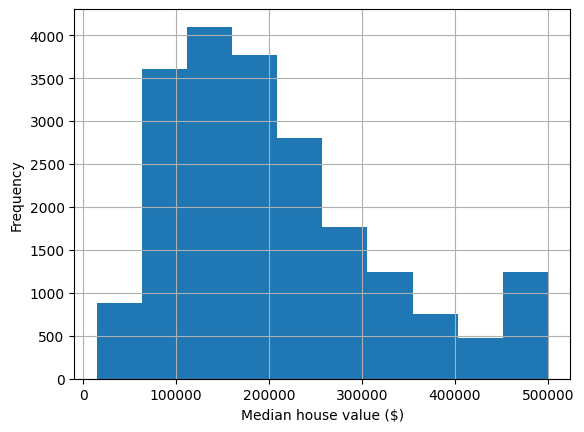

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns

df["median_income"] = df["median_income"] * 10000

df["median_house_value"].hist()
plt.ylabel('Frequency')
plt.xlabel('Median house value ($)')

Text(0.5, 0, 'Median Income ($)')

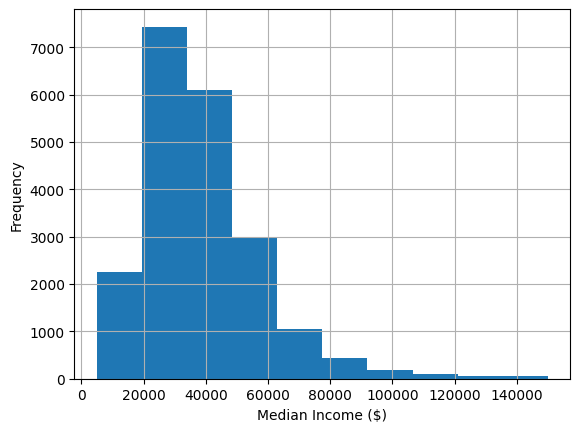

In [17]:
df["median_income"].hist()
plt.ylabel('Frequency')
plt.xlabel('Median Income ($)')

Text(0.5, 0, 'Median income')

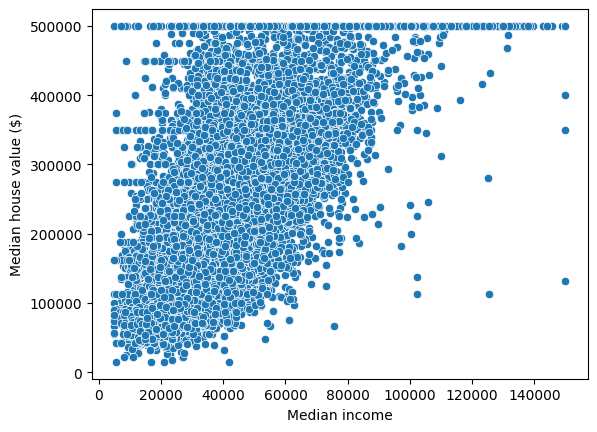

In [18]:
sns.scatterplot(
    x='median_income',
    y='median_house_value',
    data=df
)
plt.ylabel('Median house value ($)')
plt.xlabel('Median income')

/Users/johnjones/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

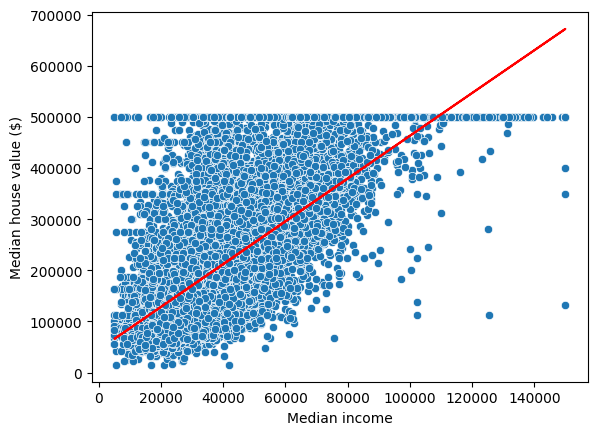

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[["median_income"]], df["median_house_value"])

y_pred = model.predict(df[["median_income"]])

sns.scatterplot(
    x='median_income',
    y='median_house_value',
    data=df
)
plt.plot(df["median_income"], y_pred, color='red')
plt.ylabel('Median house value ($)')
plt.xlabel('Median income')


In [29]:
from sklearn.metrics import r2_score

r2_score(df["median_house_value"], y_pred)

0.47344749180719903

In [35]:
from sklearn.model_selection import train_test_split

X = df[df.columns.difference(['median_house_value'])]
y = df['median_house_value']
names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [39]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())

from interpret import show
from interpret.glassbox import ExplainableBoostingRegressor

model = ExplainableBoostingRegressor(names, interactions=3)
model.fit(X_train, y_train)

show(model.explain_global())


In [41]:
from interpret.perf import RegressionPerf

perf = RegressionPerf(model).explain_perf(X_test, y_test)
show(perf)

# PySpark Integration

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

spark = SparkSession.builder.appName("CaliforniaHousing").getOrCreate()

spark_df = spark.createDataFrame(df)

filtered_df = spark_df.filter(col("median_house_value") > 200000)

filtered_df.show(5)


PySpark DataFrame (filtered):


+---------+--------+------------------+-----------+--------------+----------+----------+-----------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|    median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-----------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|          83252.0|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|83013.99999999999|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|          72574.0|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|56430.99999999999|          341300.0|       NEAR BAY|
|  -12